In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


To access the Bid and Ask datasets from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:
np.random.seed(42)

In [6]:
# reading ask and bid datasets
bid_file_path = '/content/drive/My Drive/finance_dataset/USDCAD_1 Min_Bid_2024.09.01_2024.11.30.csv'

bid_df = pd.read_csv(bid_file_path)

ask_file_path = '/content/drive/My Drive/finance_dataset/USDCAD_1 Min_Ask_2024.09.01_2024.11.30.csv'

ask_df = pd.read_csv(ask_file_path)

In [7]:
bid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (EET)  93600 non-null  object 
 1   Open        93600 non-null  float64
 2   High        93600 non-null  float64
 3   Low         93600 non-null  float64
 4   Close       93600 non-null  float64
 5   Volume      93600 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.3+ MB


In [8]:
bid_df.head(10)

,Time (EET),Open,High,Low,Close,Volume
0,2024.09.02 00:00:00,1.34837,1.34846,1.34837,1.34846,1.80
1,2024.09.02 00:01:00,1.34844,1.34844,1.34844,1.34844,0.90
2,2024.09.02 00:02:00,1.34840,1.34841,1.34839,1.34841,1.80
3,2024.09.02 00:03:00,1.34840,1.34842,1.34838,1.34838,5.85
4,2024.09.02 00:04:00,1.34840,1.34840,1.34839,1.34839,2.55
5,2024.09.02 00:05:00,1.34843,1.34851,1.34843,1.34851,9.36
6,2024.09.02 00:06:00,1.34851,1.34852,1.34851,1.34852,2.40
7,2024.09.02 00:07:00,1.34852,1.34852,1.34852,1.34852,0.00
8,2024.09.02 00:08:00,1.34836,1.34866,1.34836,1.34851,8.25
9,2024.09.02 00:09:00,1.34852,1.34852,1.34851,1.34851,2.55


In [9]:
bid_df.tail()

,Time (EET),Open,High,Low,Close,Volume
93595,2024.11.29 23:55:00,1.40035,1.40035,1.40012,1.40012,68.46
93596,2024.11.29 23:56:00,1.40013,1.40013,1.40006,1.40006,54.36
93597,2024.11.29 23:57:00,1.40011,1.40011,1.39996,1.40010,17.61
93598,2024.11.29 23:58:00,1.40024,1.40028,1.39885,1.39887,82.50
93599,2024.11.29 23:59:00,1.39888,1.39888,1.39887,1.39887,12.60


In [10]:
bid_df.describe()

,Open,High,Low,Close,Volume
count,93600.000000,93600.000000,93600.000000,93600.000000,93600.000000
mean,1.375329,1.375391,1.375268,1.375329,102.855298
std,0.019580,0.019584,0.019575,0.019580,86.033965
min,1.341930,1.342080,1.341900,1.341920,0.000000
25%,1.356430,1.356480,1.356370,1.356430,44.730000
50%,1.379010,1.379070,1.378945,1.379010,82.650000
75%,1.392270,1.392330,1.392210,1.392270,135.847500
max,1.417630,1.417740,1.416420,1.417620,1062.250000


In [11]:
ask_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (EET)  93600 non-null  object 
 1   Open        93600 non-null  float64
 2   High        93600 non-null  float64
 3   Low         93600 non-null  float64
 4   Close       93600 non-null  float64
 5   Volume      93600 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.3+ MB


In [12]:
ask_df.head(10)

,Time (EET),Open,High,Low,Close,Volume
0,2024.09.02 00:00:00,1.34897,1.34898,1.34897,1.34898,3.60
1,2024.09.02 00:01:00,1.34899,1.34899,1.34898,1.34898,1.80
2,2024.09.02 00:02:00,1.34897,1.34899,1.34897,1.34899,2.70
3,2024.09.02 00:03:00,1.34899,1.34899,1.34897,1.34897,4.50
4,2024.09.02 00:04:00,1.34896,1.34896,1.34896,1.34896,2.40
5,2024.09.02 00:05:00,1.34897,1.34899,1.34897,1.34898,7.20
6,2024.09.02 00:06:00,1.34899,1.34899,1.34897,1.34897,2.40
7,2024.09.02 00:07:00,1.34897,1.34897,1.34897,1.34897,0.00
8,2024.09.02 00:08:00,1.34925,1.34940,1.34925,1.34939,8.07
9,2024.09.02 00:09:00,1.34933,1.34933,1.34933,1.34933,3.12


In [13]:
ask_df.tail()

,Time (EET),Open,High,Low,Close,Volume
93595,2024.11.29 23:55:00,1.40096,1.40100,1.40096,1.40100,54.0
93596,2024.11.29 23:56:00,1.40099,1.40113,1.40099,1.40110,48.0
93597,2024.11.29 23:57:00,1.40110,1.40115,1.40100,1.40100,10.5
93598,2024.11.29 23:58:00,1.40100,1.40148,1.40100,1.40141,120.0
93599,2024.11.29 23:59:00,1.40140,1.40192,1.40136,1.40192,16.5


In [14]:
ask_df.describe()

,Open,High,Low,Close,Volume
count,93600.000000,93600.000000,93600.000000,93600.000000,93600.000000
mean,1.375469,1.375530,1.375407,1.375470,103.603841
std,0.019578,0.019583,0.019574,0.019578,87.371150
min,1.342030,1.342210,1.342020,1.342050,0.000000
25%,1.356570,1.356620,1.356510,1.356570,44.400000
50%,1.379130,1.379200,1.379080,1.379140,82.500000
75%,1.392430,1.392500,1.392370,1.392430,137.460000
max,1.417810,1.417880,1.416590,1.417770,1245.480000


In [16]:
df = bid_df.merge(ask_df, left_on='Time (EET)', right_on='Time (EET)', how='outer')
df

,Time (EET),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.09.02 00:00:00,1.34837,1.34846,1.34837,1.34846,1.80,1.34897,1.34898,1.34897,1.34898,3.6
1,2024.09.02 00:01:00,1.34844,1.34844,1.34844,1.34844,0.90,1.34899,1.34899,1.34898,1.34898,1.8
2,2024.09.02 00:02:00,1.34840,1.34841,1.34839,1.34841,1.80,1.34897,1.34899,1.34897,1.34899,2.7
3,2024.09.02 00:03:00,1.34840,1.34842,1.34838,1.34838,5.85,1.34899,1.34899,1.34897,1.34897,4.5
4,2024.09.02 00:04:00,1.34840,1.34840,1.34839,1.34839,2.55,1.34896,1.34896,1.34896,1.34896,2.4
...,...,...,...,...,...,...,...,...,...,...,...
93595,2024.11.29 23:55:00,1.40035,1.40035,1.40012,1.40012,68.46,1.40096,1.40100,1.40096,1.40100,54.0
93596,2024.11.29 23:56:00,1.40013,1.40013,1.40006,1.40006,54.36,1.40099,1.40113,1.40099,1.40110,48.0
93597,2024.11.29 23:57:00,1.40011,1.40011,1.39996,1.40010,17.61,1.40110,1.40115,1.40100,1.40100,10.5
93598,2024.11.29 23:58:00,1.40024,1.40028,1.39885,1.39887,82.50,1.40100,1.40148,1.40100,1.40141,120.0


In [17]:
df['Local_time_T'] = pd.to_datetime(df['Time (EET)'], utc = True)

In [18]:
df = df.drop(['Time (EET)'], axis=1)

In [19]:
df.head()

,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,Local_time_T
0,1.34837,1.34846,1.34837,1.34846,1.80,1.34897,1.34898,1.34897,1.34898,3.6,2024-09-02 00:00:00+00:00
1,1.34844,1.34844,1.34844,1.34844,0.90,1.34899,1.34899,1.34898,1.34898,1.8,2024-09-02 00:01:00+00:00
2,1.34840,1.34841,1.34839,1.34841,1.80,1.34897,1.34899,1.34897,1.34899,2.7,2024-09-02 00:02:00+00:00
3,1.34840,1.34842,1.34838,1.34838,5.85,1.34899,1.34899,1.34897,1.34897,4.5,2024-09-02 00:03:00+00:00
4,1.34840,1.34840,1.34839,1.34839,2.55,1.34896,1.34896,1.34896,1.34896,2.4,2024-09-02 00:04:00+00:00


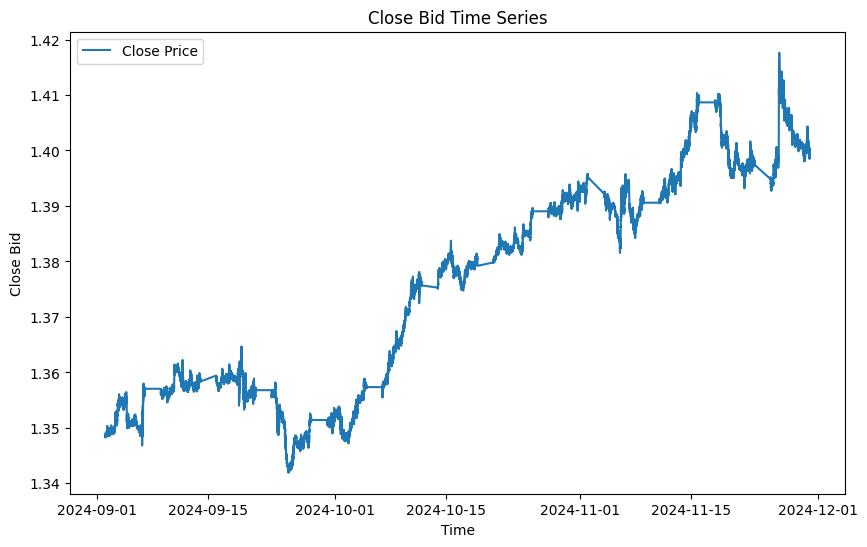

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Close_x'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Close Bid')
plt.title('Close Bid Time Series')
plt.legend()
plt.show()

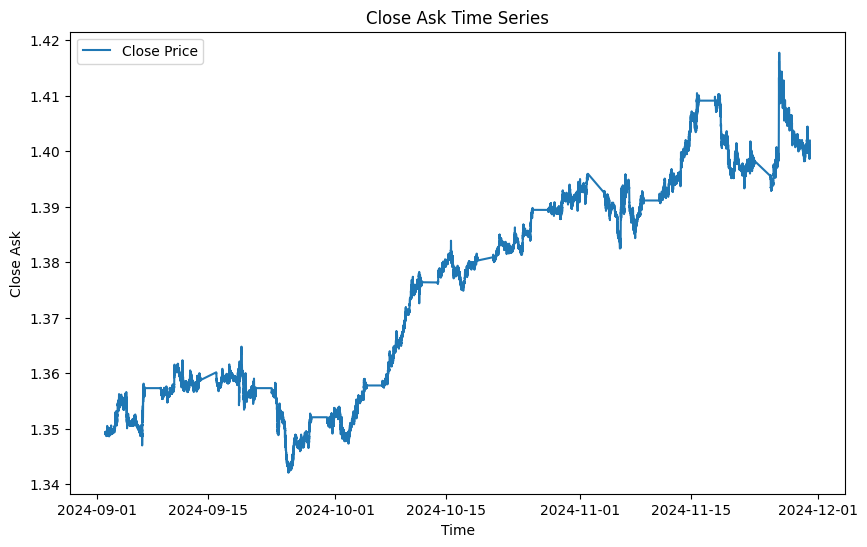

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Close_y'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Close Ask')
plt.title('Close Ask Time Series')
plt.legend()
plt.show()

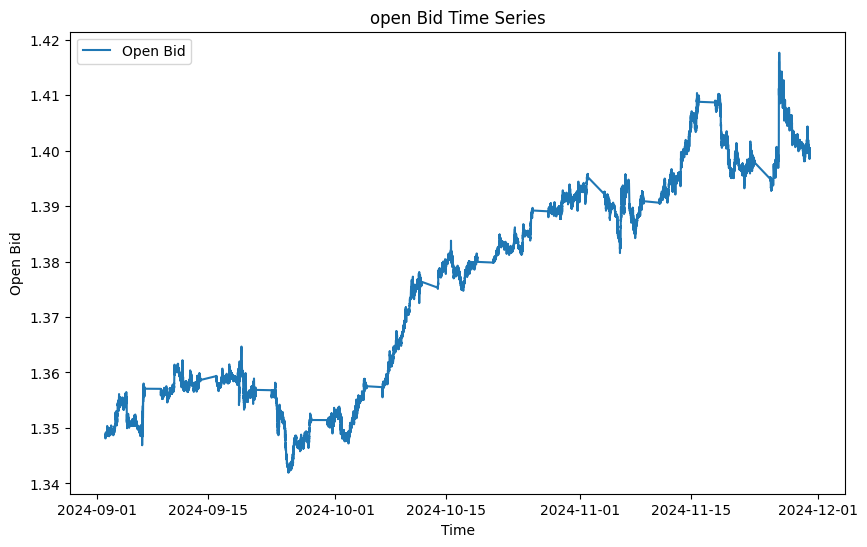

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Open_x'], label='Open Bid')
plt.xlabel('Time')
plt.ylabel('Open Bid')
plt.title('open Bid Time Series')
plt.legend()
plt.show()

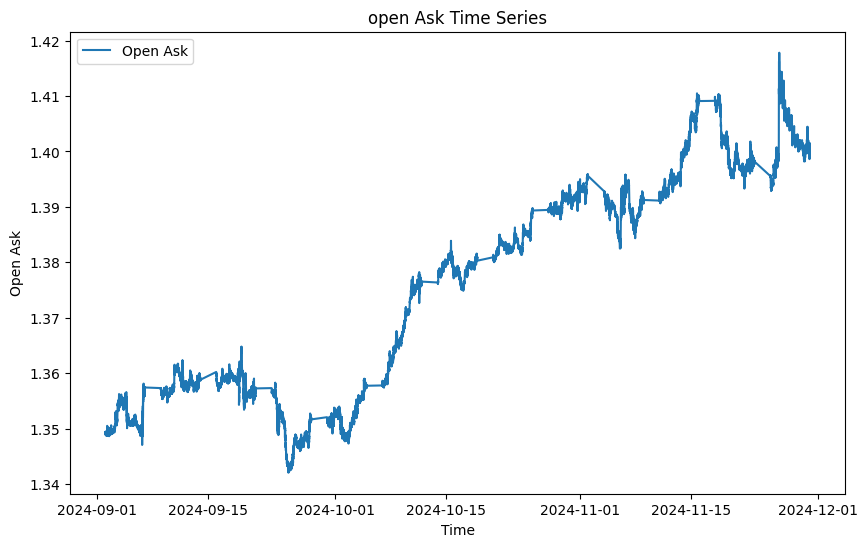

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Open_y'], label='Open Ask')
plt.xlabel('Time')
plt.ylabel('Open Ask')
plt.title('open Ask Time Series')
plt.legend()
plt.show()

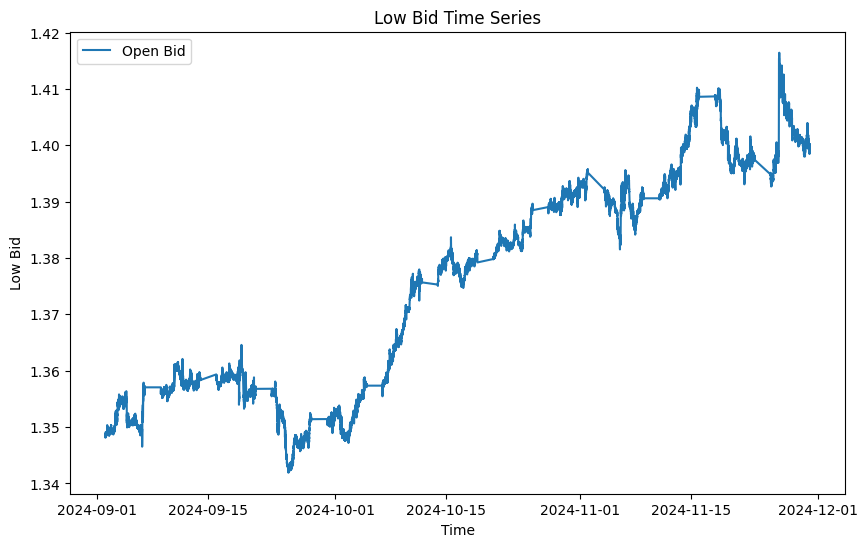

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Low_x'], label='Open Bid')
plt.xlabel('Time')
plt.ylabel('Low Bid')
plt.title('Low Bid Time Series')
plt.legend()
plt.show()

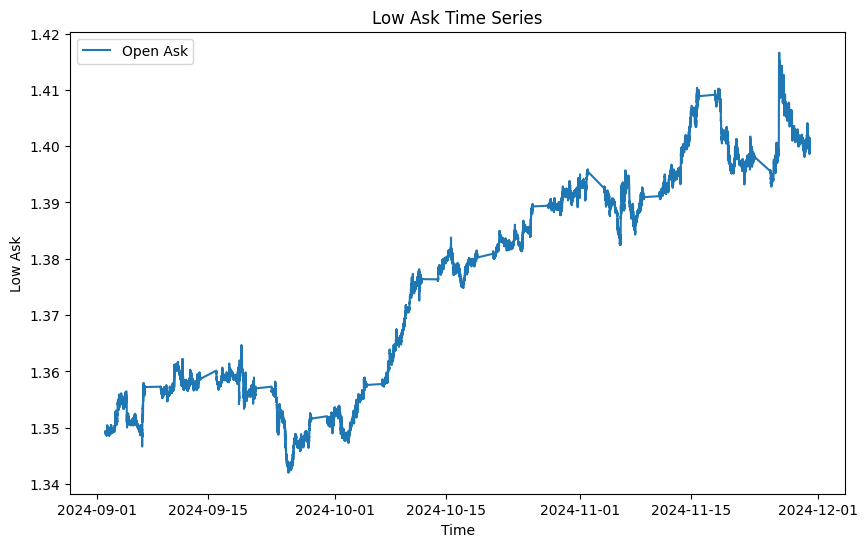

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Low_y'], label='Open Ask')
plt.xlabel('Time')
plt.ylabel('Low Ask')
plt.title('Low Ask Time Series')
plt.legend()
plt.show()

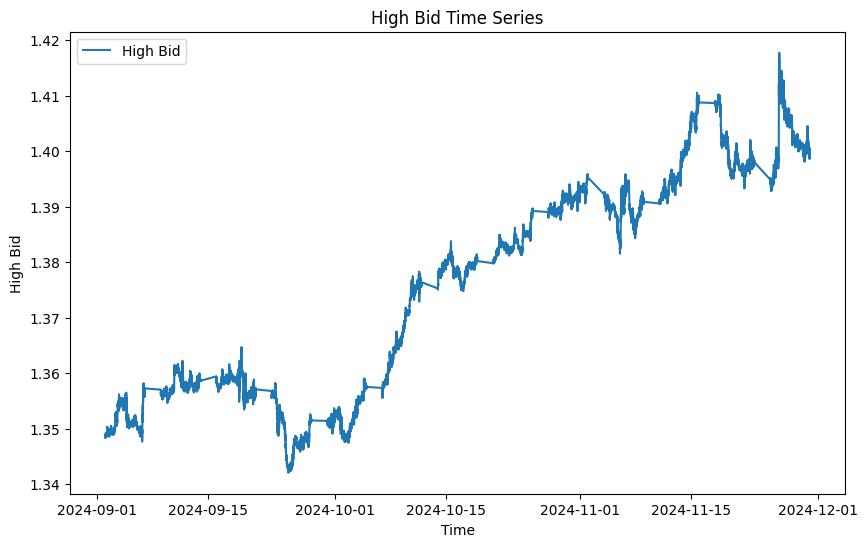

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['High_x'], label='High Bid')
plt.xlabel('Time')
plt.ylabel('High Bid')
plt.title('High Bid Time Series')
plt.legend()
plt.show()

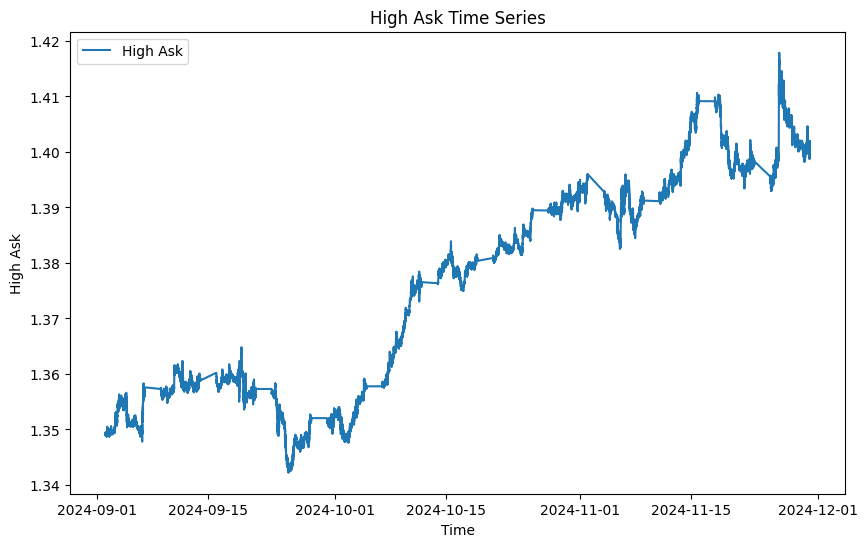

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['High_y'], label='High Ask')
plt.xlabel('Time')
plt.ylabel('High Ask')
plt.title('High Ask Time Series')
plt.legend()
plt.show()

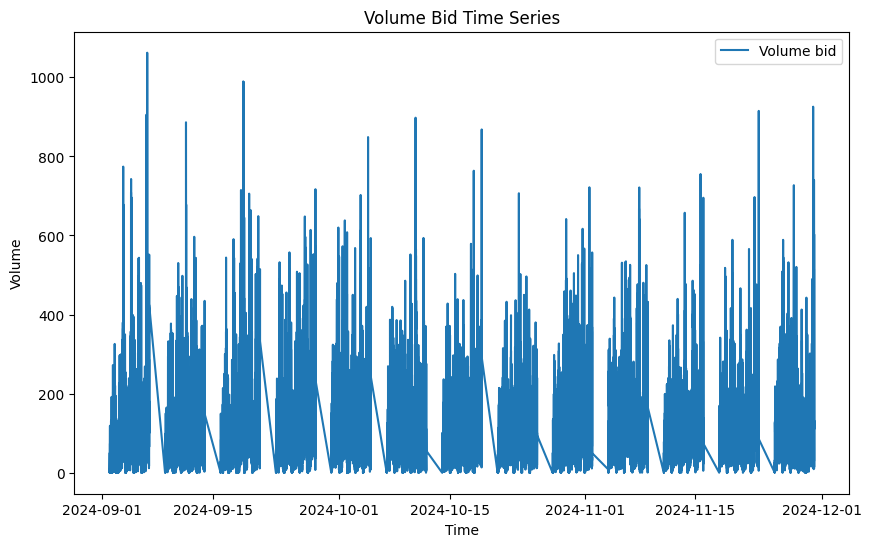

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Volume _x'], label='Volume bid')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Bid Time Series')
plt.legend()
plt.show()

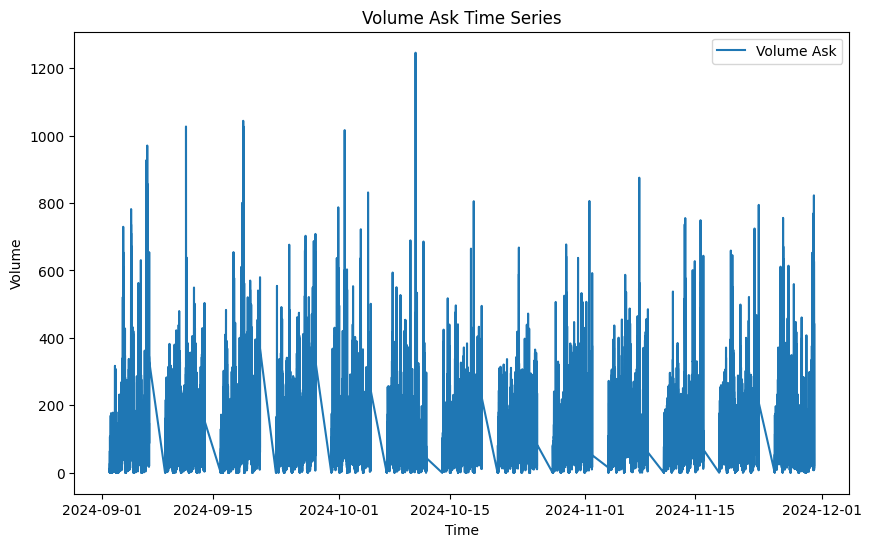

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Volume _y'], label='Volume Ask')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Ask Time Series')
plt.legend()
plt.show()

In [30]:
df["Open_mdp"] = (df["Open_y"]  + df["Open_x"])/2
df["High_mdp"] = (df["High_y"]  + df["High_x"])/2
df["Low_mdp"]  = (df["Low_y"]   + df["Low_x"])/2
df["Close_mdp"]= (df["Close_y"] + df["Close_x"])/2

df["Volume_Delta"] = df["Volume _y"] - df["Volume _x"]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Open_x        93600 non-null  float64            
 1   High_x        93600 non-null  float64            
 2   Low_x         93600 non-null  float64            
 3   Close_x       93600 non-null  float64            
 4   Volume _x     93600 non-null  float64            
 5   Open_y        93600 non-null  float64            
 6   High_y        93600 non-null  float64            
 7   Low_y         93600 non-null  float64            
 8   Close_y       93600 non-null  float64            
 9   Volume _y     93600 non-null  float64            
 10  Local_time_T  93600 non-null  datetime64[ns, UTC]
 11  Open_mdp      93600 non-null  float64            
 12  High_mdp      93600 non-null  float64            
 13  Low_mdp       93600 non-null  float64            
 14  Close_

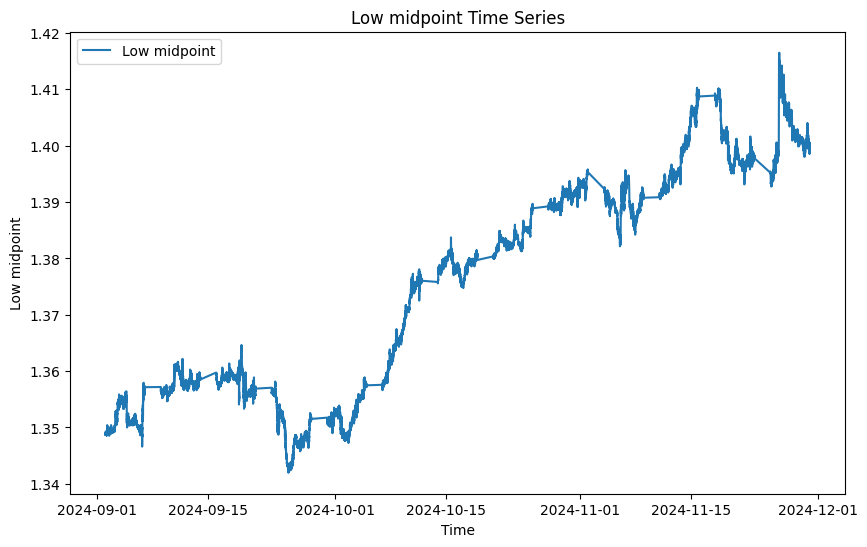

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Low_mdp'], label='Low midpoint')
plt.xlabel('Time')
plt.ylabel('Low midpoint')
plt.title('Low midpoint Time Series')
plt.legend()
plt.show()

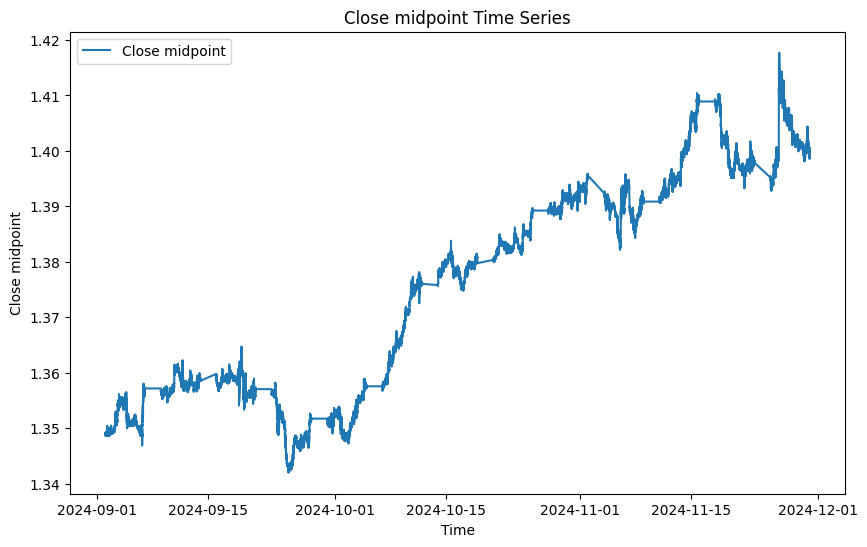

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Close_mdp'], label='Close midpoint')
plt.xlabel('Time')
plt.ylabel('Close midpoint')
plt.title('Close midpoint Time Series')
plt.legend()
plt.show()

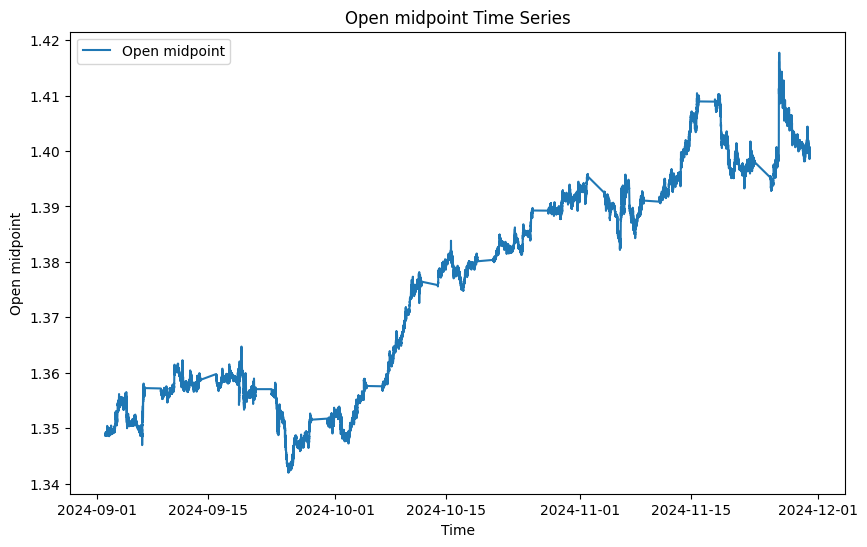

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['Open_mdp'], label='Open midpoint')
plt.xlabel('Time')
plt.ylabel('Open midpoint')
plt.title('Open midpoint Time Series')
plt.legend()
plt.show()

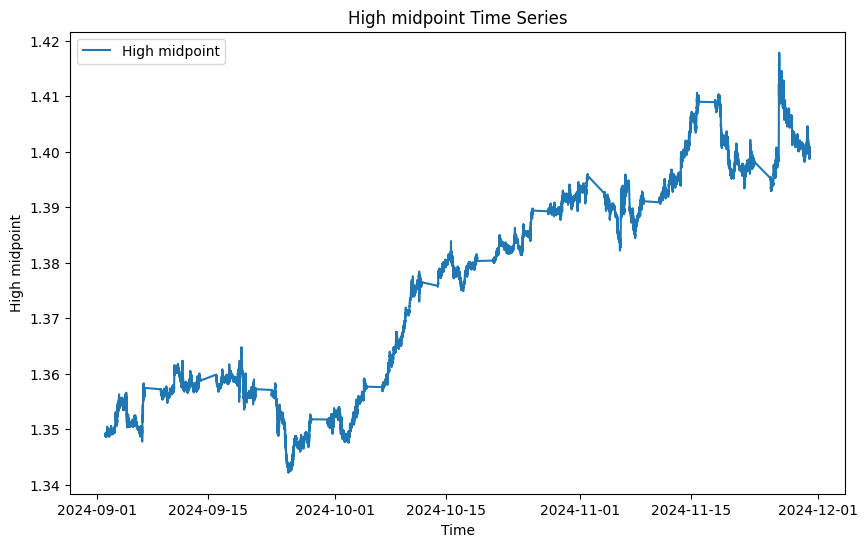

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['Local_time_T'], df['High_mdp'], label='High midpoint')
plt.xlabel('Time')
plt.ylabel('High midpoint')
plt.title('High midpoint Time Series')
plt.legend()
plt.show()

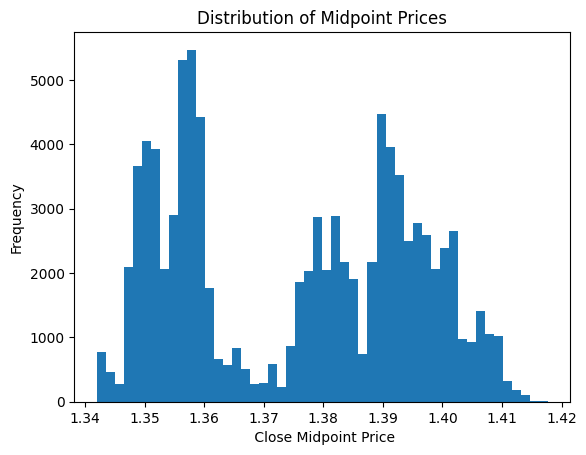

In [192]:
plt.hist(df['Close_mdp'], bins=50)  # Adjust bins as needed

plt.title('Distribution of Midpoint Prices')
plt.xlabel(' Close Midpoint Price')
plt.ylabel('Frequency')

plt.show()

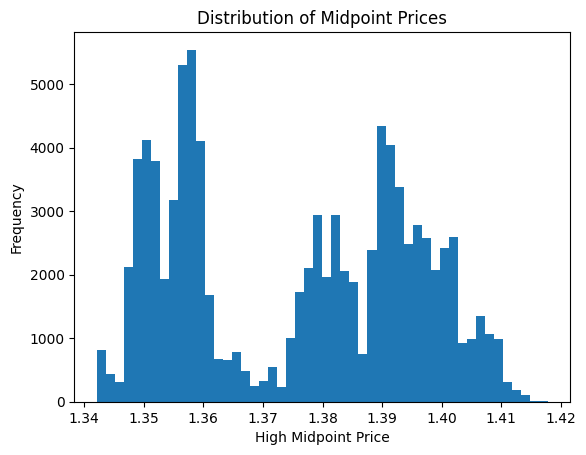

In [193]:
plt.hist(df['High_mdp'], bins=50)  # Adjust bins as needed

plt.title('Distribution of Midpoint Prices')
plt.xlabel('High Midpoint Price')
plt.ylabel('Frequency')

plt.show()

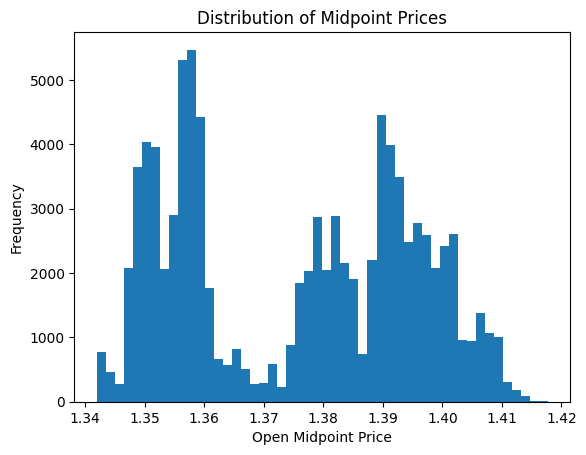

In [194]:
plt.hist(df['Open_mdp'], bins=50)  # Adjust bins as needed

plt.title('Distribution of Midpoint Prices')
plt.xlabel('Open Midpoint Price')
plt.ylabel('Frequency')

plt.show()

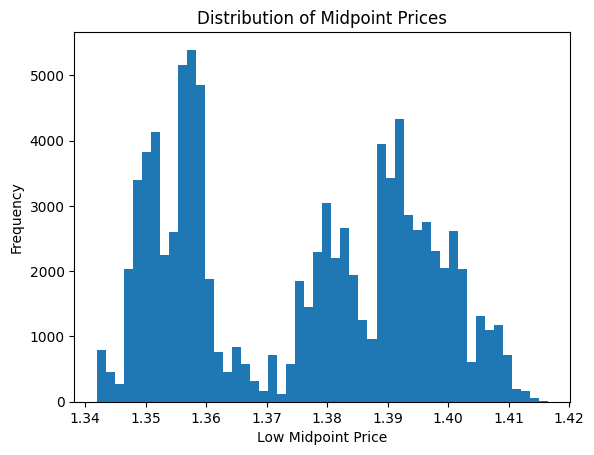

In [196]:
plt.hist(df['Low_mdp'], bins=50)  # Adjust bins as needed

plt.title('Distribution of Midpoint Prices')
plt.xlabel('Low Midpoint Price')
plt.ylabel('Frequency')

plt.show()

In [40]:
df['is_start_of_hour'] = (df['Local_time_T'].dt.minute == 0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_x            93600 non-null  float64            
 1   High_x            93600 non-null  float64            
 2   Low_x             93600 non-null  float64            
 3   Close_x           93600 non-null  float64            
 4   Volume _x         93600 non-null  float64            
 5   Open_y            93600 non-null  float64            
 6   High_y            93600 non-null  float64            
 7   Low_y             93600 non-null  float64            
 8   Close_y           93600 non-null  float64            
 9   Volume _y         93600 non-null  float64            
 10  Local_time_T      93600 non-null  datetime64[ns, UTC]
 11  Open_mdp          93600 non-null  float64            
 12  High_mdp          93600 non-null  float64            
 13  L

In [41]:
df['lag_1'] = df['Close_mdp'].shift(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_x            93600 non-null  float64            
 1   High_x            93600 non-null  float64            
 2   Low_x             93600 non-null  float64            
 3   Close_x           93600 non-null  float64            
 4   Volume _x         93600 non-null  float64            
 5   Open_y            93600 non-null  float64            
 6   High_y            93600 non-null  float64            
 7   Low_y             93600 non-null  float64            
 8   Close_y           93600 non-null  float64            
 9   Volume _y         93600 non-null  float64            
 10  Local_time_T      93600 non-null  datetime64[ns, UTC]
 11  Open_mdp          93600 non-null  float64            
 12  High_mdp          93600 non-null  float64            
 13  L

In [43]:
# Calculate Simple Moving Average (SMA)
df['SMA_10'] = df['Close_mdp'].rolling(window=10).mean()  # 10-period SMA
df['SMA_50'] = df['Close_mdp'].rolling(window=50).mean()  # 50-period SMA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Open_x            93600 non-null  float64            
 1   High_x            93600 non-null  float64            
 2   Low_x             93600 non-null  float64            
 3   Close_x           93600 non-null  float64            
 4   Volume _x         93600 non-null  float64            
 5   Open_y            93600 non-null  float64            
 6   High_y            93600 non-null  float64            
 7   Low_y             93600 non-null  float64            
 8   Close_y           93600 non-null  float64            
 9   Volume _y         93600 non-null  float64            
 10  Local_time_T      93600 non-null  datetime64[ns, UTC]
 11  Open_mdp          93600 non-null  float64            
 12  High_mdp          93600 non-null  float64            
 13  L

In [45]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

df['RSI'] = compute_rsi(df['Close_mdp'], window=14)

In [44]:
bid_df = bid_df.dropna()
print(bid_df.isnull().sum())  # Ensure all columns have 0 null values
print(bid_df.shape)
bid_df.info()

Time (EET)    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64
(93600, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93600 entries, 0 to 93599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (EET)  93600 non-null  object 
 1   Open        93600 non-null  float64
 2   High        93600 non-null  float64
 3   Low         93600 non-null  float64
 4   Close       93600 non-null  float64
 5   Volume      93600 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.3+ MB


In [46]:
df = df.dropna()
print(df.isnull().sum())  # Ensure all columns have 0 null values
print(df.shape)
df.head()

Open_x              0
High_x              0
Low_x               0
Close_x             0
Volume _x           0
Open_y              0
High_y              0
Low_y               0
Close_y             0
Volume _y           0
Local_time_T        0
Open_mdp            0
High_mdp            0
Low_mdp             0
Close_mdp           0
Volume_Delta        0
is_start_of_hour    0
lag_1               0
SMA_10              0
SMA_50              0
RSI                 0
dtype: int64
(93551, 21)


,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,...,Open_mdp,High_mdp,Low_mdp,Close_mdp,Volume_Delta,is_start_of_hour,lag_1,SMA_10,SMA_50,RSI
49,1.34844,1.34848,1.34840,1.34842,19.86,1.34895,1.34897,1.34894,1.34895,24.15,...,1.348695,1.348725,1.348670,1.348685,4.29,0,1.348690,1.348925,1.348887,30.158730
50,1.34840,1.34842,1.34840,1.34840,26.79,1.34896,1.34896,1.34891,1.34895,27.75,...,1.348680,1.348690,1.348655,1.348675,0.96,0,1.348685,1.348900,1.348887,29.687500
51,1.34840,1.34841,1.34840,1.34841,11.13,1.34894,1.34894,1.34893,1.34893,12.60,...,1.348670,1.348675,1.348665,1.348670,1.47,0,1.348675,1.348874,1.348886,29.457364
52,1.34841,1.34841,1.34841,1.34841,3.12,1.34893,1.34893,1.34891,1.34891,3.15,...,1.348670,1.348670,1.348660,1.348660,0.03,0,1.348670,1.348844,1.348885,29.230769
53,1.34840,1.34844,1.34840,1.34844,20.22,1.34892,1.34898,1.34892,1.34898,21.00,...,1.348660,1.348710,1.348660,1.348710,0.78,0,1.348660,1.348808,1.348886,34.285714


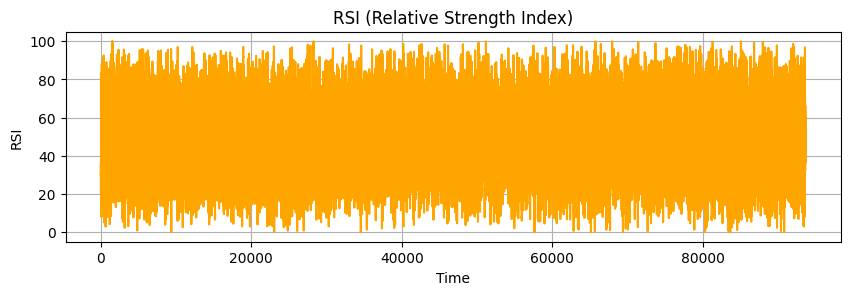

In [47]:
plt.figure(figsize=(10, 6))

# Plotting RSI
plt.subplot(2, 1, 1)
plt.plot(df['RSI'], label='RSI', color='orange')
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.grid()

In [48]:
df['Direction'] = (df['Close_mdp'] >df['lag_1']).astype(int)
df.head()

<ipython-input-48-0d4c53f30ed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] = (df['Close_mdp'] >df['lag_1']).astype(int)


,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y,...,High_mdp,Low_mdp,Close_mdp,Volume_Delta,is_start_of_hour,lag_1,SMA_10,SMA_50,RSI,Direction
49,1.34844,1.34848,1.34840,1.34842,19.86,1.34895,1.34897,1.34894,1.34895,24.15,...,1.348725,1.348670,1.348685,4.29,0,1.348690,1.348925,1.348887,30.158730,0
50,1.34840,1.34842,1.34840,1.34840,26.79,1.34896,1.34896,1.34891,1.34895,27.75,...,1.348690,1.348655,1.348675,0.96,0,1.348685,1.348900,1.348887,29.687500,0
51,1.34840,1.34841,1.34840,1.34841,11.13,1.34894,1.34894,1.34893,1.34893,12.60,...,1.348675,1.348665,1.348670,1.47,0,1.348675,1.348874,1.348886,29.457364,0
52,1.34841,1.34841,1.34841,1.34841,3.12,1.34893,1.34893,1.34891,1.34891,3.15,...,1.348670,1.348660,1.348660,0.03,0,1.348670,1.348844,1.348885,29.230769,0
53,1.34840,1.34844,1.34840,1.34844,20.22,1.34892,1.34898,1.34892,1.34898,21.00,...,1.348710,1.348660,1.348710,0.78,0,1.348660,1.348808,1.348886,34.285714,1


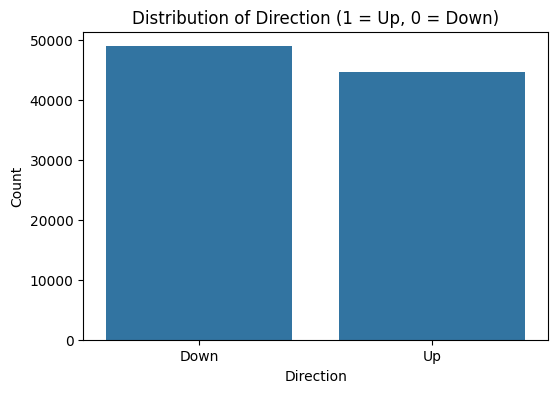

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Direction', data=df)
plt.title('Distribution of Direction (1 = Up, 0 = Down)')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Down', 'Up'])
plt.show()

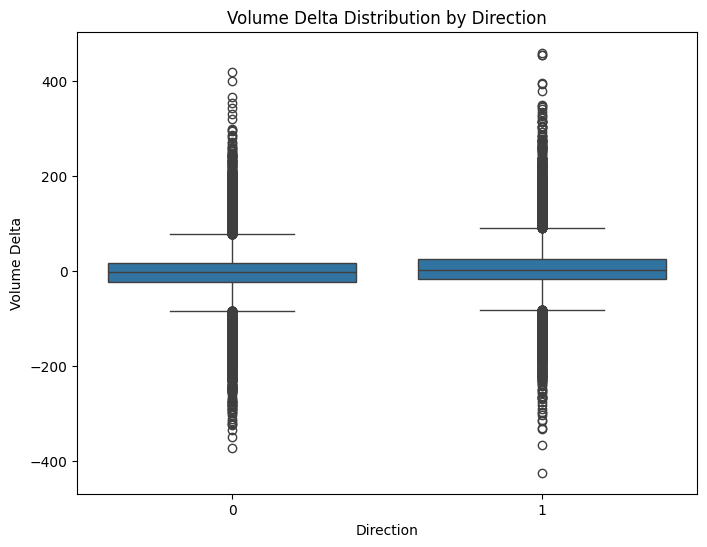

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Volume_Delta', data=df)
plt.xlabel('Direction')
plt.ylabel('Volume Delta')
plt.title('Volume Delta Distribution by Direction')
plt.show()

In [54]:
# List of columns to drop
columns_to_drop = ['Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume _x',
                   'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume _y',
                   'Local_time_T']

# Dropping the columns from the dataframe
df = df.drop(columns=columns_to_drop)

# Verify if columns are dropped
print(df.head())

    Open_mdp  High_mdp   Low_mdp  Close_mdp  Volume_Delta  is_start_of_hour  \
49  1.348695  1.348725  1.348670   1.348685          4.29                 0   
50  1.348680  1.348690  1.348655   1.348675          0.96                 0   
51  1.348670  1.348675  1.348665   1.348670          1.47                 0   
52  1.348670  1.348670  1.348660   1.348660          0.03                 0   
53  1.348660  1.348710  1.348660   1.348710          0.78                 0   

       lag_1    SMA_10    SMA_50        RSI  Direction  
49  1.348690  1.348925  1.348887  30.158730          0  
50  1.348685  1.348900  1.348887  29.687500          0  
51  1.348675  1.348874  1.348886  29.457364          0  
52  1.348670  1.348844  1.348885  29.230769          0  
53  1.348660  1.348808  1.348886  34.285714          1  


In [56]:
# reduce the intgere column memory size
column_integer = ['Direction', 'is_start_of_hour']
columns_float =['Open_mdp', 'High_mdp', 'Low_mdp', 'Close_mdp',
                'Volume_Delta','SMA_10','SMA_50','RSI','lag_1']
for column in column_integer:
    df[column] = pd.to_numeric(df[column], downcast='integer')

for column in columns_float:
    df[column] = pd.to_numeric(df[column], downcast='float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93551 entries, 49 to 93599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_mdp          93551 non-null  float32
 1   High_mdp          93551 non-null  float32
 2   Low_mdp           93551 non-null  float32
 3   Close_mdp         93551 non-null  float32
 4   Volume_Delta      93551 non-null  float32
 5   is_start_of_hour  93551 non-null  int8   
 6   lag_1             93551 non-null  float32
 7   SMA_10            93551 non-null  float32
 8   SMA_50            93551 non-null  float32
 9   RSI               93551 non-null  float32
 10  Direction         93551 non-null  int8   
dtypes: float32(9), int8(2)
memory usage: 4.1 MB


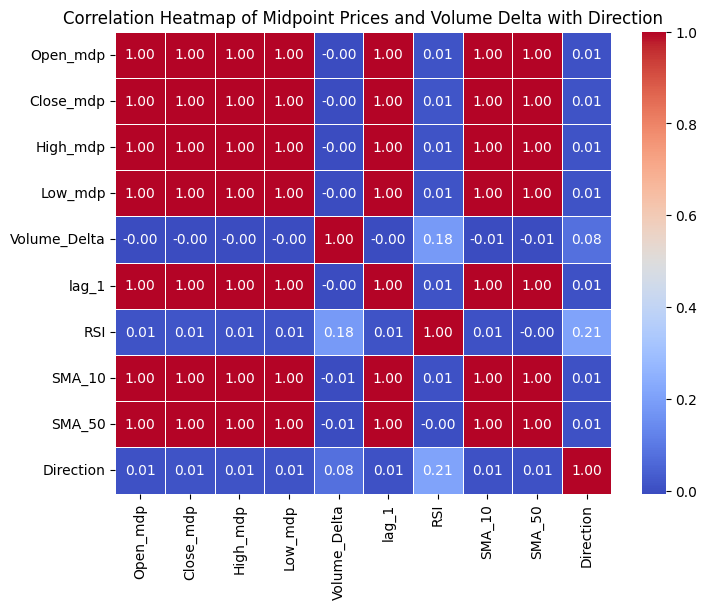

In [57]:
correlation_columns = ['Open_mdp', 'Close_mdp', 'High_mdp', 'Low_mdp', 'Volume_Delta', 'lag_1', 'RSI', 'SMA_10', 'SMA_50', 'Direction']
corr_matrix = df[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Midpoint Prices and Volume Delta with Direction')
plt.show()

In [111]:
# prepare data for trainig
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [59]:
# split data into train and test
# divide dataset into features and target

x = df.drop(columns=['Direction'])
y = df['Direction']

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(93551, 10)
(93551,)
(74840, 10)
(74840,)
(18711, 10)
(18711,)


In [61]:
# normlaizing x_train dataset except 'is_start_of_hour' column
float_columns = x_train.select_dtypes(include=['float']).columns
scaler = MinMaxScaler()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[float_columns] = scaler.fit_transform(x_train[float_columns])
x_test_scaled[float_columns] = scaler.fit_transform(x_test[float_columns])

print(x_train_scaled.shape)
print(x_train_scaled.describe())
print(x_test_scaled.shape)
x_test_scaled.describe()

(74840, 10)
           Open_mdp      High_mdp       Low_mdp     Close_mdp  Volume_Delta  \
count  74840.000000  74840.000000  74840.000000  74840.000000  74840.000000   
mean       0.440757      0.440981      0.448436      0.442021      0.448805   
std        0.259180      0.258972      0.262734      0.258750      0.056677   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.190117      0.190560      0.194380      0.191851      0.423134   
50%        0.489647      0.489923      0.498022      0.490887      0.447930   
75%        0.664881      0.664789      0.675701      0.665764      0.473878   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       is_start_of_hour         lag_1        SMA_10        SMA_50  \
count      74840.000000  74840.000000  74840.000000  74840.000000   
mean           0.016903      0.440977      0.450479      0.458921   
std            0.128908      0.259232      0.265015      0.272192   


,Open_mdp,High_mdp,Low_mdp,Close_mdp,Volume_Delta,is_start_of_hour,lag_1,SMA_10,SMA_50,RSI
count,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000,18711.000000
mean,0.450321,0.446656,0.451853,0.447753,0.515602,0.015713,0.450070,0.448255,0.456468,0.502821
std,0.263986,0.262990,0.265283,0.263632,0.057647,0.124365,0.263877,0.264182,0.271285,0.175546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196579,0.193840,0.196730,0.194151,0.489704,0.000000,0.196497,0.194227,0.195658,0.378698
50%,0.498074,0.494272,0.500067,0.495712,0.514603,0.000000,0.497938,0.495859,0.504215,0.505155
75%,0.680241,0.675583,0.682996,0.677362,0.541062,0.000000,0.679895,0.677999,0.691912,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

# Extract feature importances
importances = rf.feature_importances_
feature_names = x_train_scaled.columns

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

Open_mdp: 0.1034
High_mdp: 0.0888
Low_mdp: 0.0882
Close_mdp: 0.1246
Volume_Delta: 0.1274
is_start_of_hour: 0.0023
lag_1: 0.1097
SMA_10: 0.0929
SMA_50: 0.1014
RSI: 0.1612


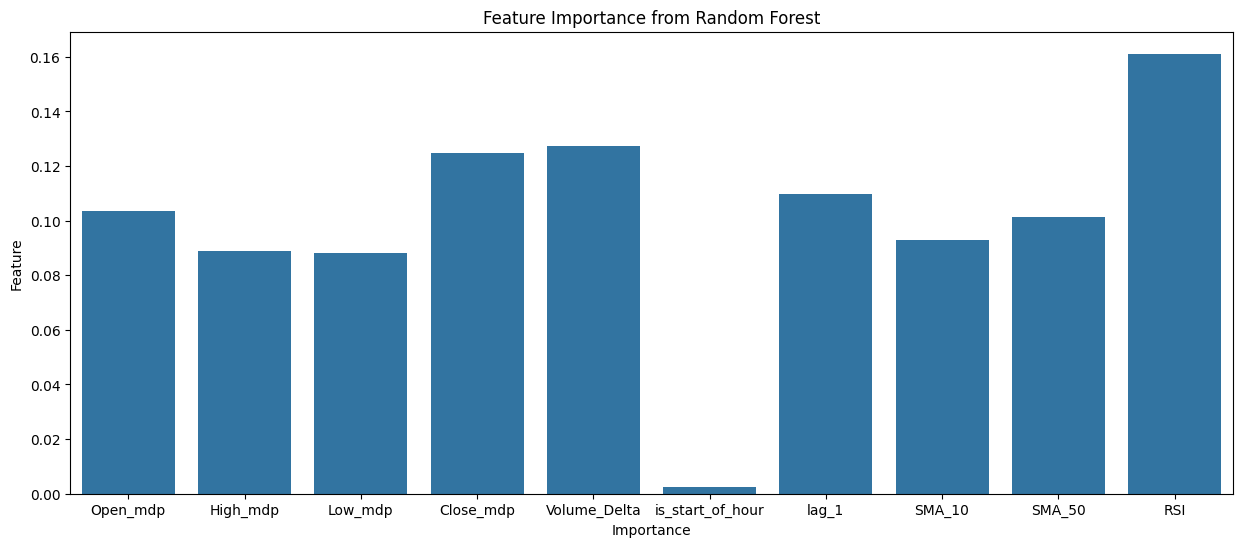

In [64]:
# Plot feature importance
plt.figure(figsize=(15, 6))
sns.barplot(x=feature_names, y=importances)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [65]:
# train fist mdoel whicih is Random Forest
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [66]:
# classification matrix for random forest
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67      9780
           1       0.61      0.32      0.42      8931

    accuracy                           0.58     18711
   macro avg       0.59      0.57      0.54     18711
weighted avg       0.59      0.58      0.55     18711



Random Forest Confusion Matrix:


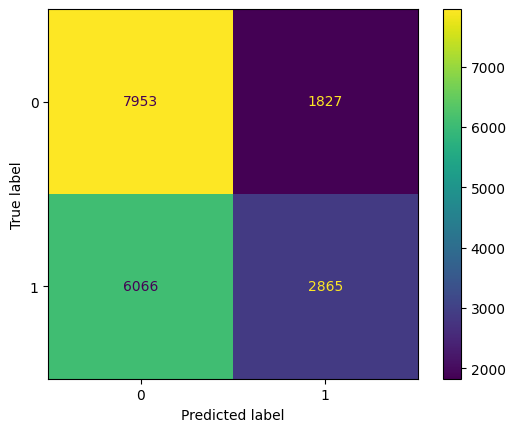

In [139]:
print("Random Forest Confusion Matrix:")

rf_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=[0, 1])
rf_disp.plot()
plt.show()

In [69]:
# traning second model Support Vector Machine
from sklearn.svm import SVC


# Initialize the Support Vector Machine model
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm.predict(x_test_scaled)

In [70]:
# classification report for random forest
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      9780
           1       0.63      0.43      0.51      8931

    accuracy                           0.61     18711
   macro avg       0.61      0.60      0.59     18711
weighted avg       0.61      0.61      0.59     18711



SVM Confusion Matrix:


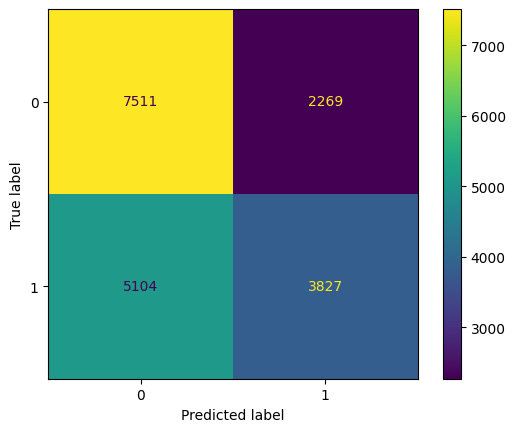

In [138]:
# confusion matrix for random forest
print("SVM Confusion Matrix:")

svm_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=[0, 1])
svm_disp.plot()
plt.show()

In [107]:
# creating thrid model Multi-Layer Perceptron
mlp_model = keras.Sequential([
    keras.layers.Dense(128, input_dim=10, activation='sigmoid', kernel_initializer='normal'),
    keras.layers.Dense(64, activation='sigmoid', kernel_initializer='normal'),

    keras.layers.Dense(1, activation='sigmoid')
])

print(mlp_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [117]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# Early Stopping parameters

mlp_es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
mlp_mc = ModelCheckpoint('best_model_MLP_USD/CAD.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [79]:
y_train.shape

(74840,)

In [119]:
mlp_history = mlp_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2, verbose=1,callbacks = [mlp_es,mlp_mc])

Epoch 1/20
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.6788
Epoch 1: val_accuracy improved from -inf to 0.58572, saving model to best_model_MLP_USD/CAD.keras
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5681 - loss: 0.6788 - val_accuracy: 0.5857 - val_loss: 0.6692
Epoch 2/20
5956/5988 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5749 - loss: 0.6750
Epoch 2: val_accuracy improved from 0.58572 to 0.58645, saving model to best_model_MLP_USD/CAD.keras
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.5749 - loss: 0.6750 - val_accuracy: 0.5865 - val_loss: 0.6687
Epoch 3/20
5982/5988 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.6722
Epoch 3: val_accuracy did not improve from 0.58645
5988/5988 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.5794 - loss: 0.6722 - val_accuracy: 0.5862 - val_loss: 0.6682
Epoch 4/20
5976/5988 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5835 - loss: 0.6714
Epoch 4: val_accuracy improved from 0.

In [120]:
MLP_saved_best_model = keras.models.load_model('best_model_MLP_USD/CAD.keras')

In [121]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

mlp_scores = MLP_saved_best_model.evaluate(x_test, y_test, verbose=1)

585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5822 - loss: 0.6722


Text(0.5, 0, 'Mean Squared Error')

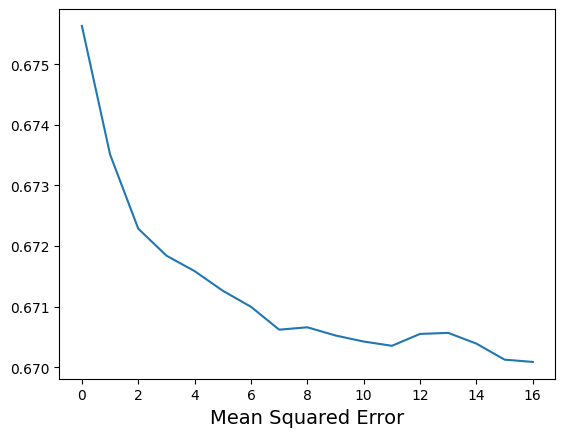

In [122]:
plt.plot(mlp_history.history['loss'])
plt.xlabel('Mean Squared Error', size = 14)

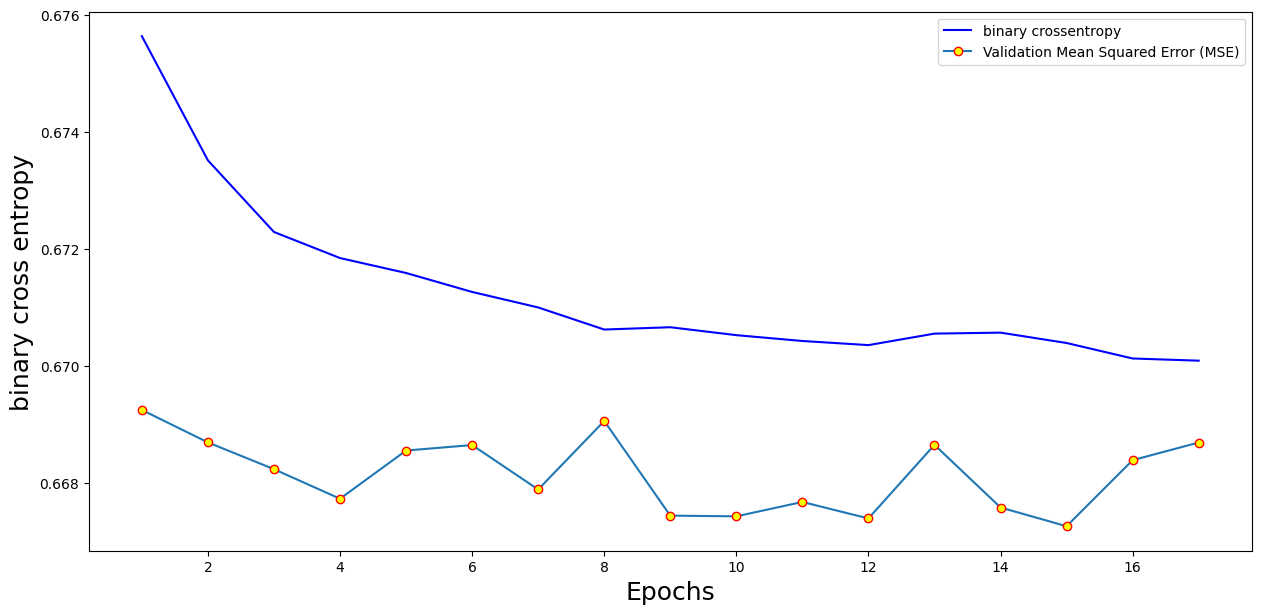

In [156]:
# More detailed MSE graph

mlp_history_dict = mlp_history.history

mlp_loss_values = mlp_history_dict['loss']
mlp_val_loss_values = mlp_history_dict['val_loss']

epochs = range(1, len(mlp_loss_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mlp_loss_values, 'b', label='binary crossentropy')
plt.plot(epochs, mlp_val_loss_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('binary cross entropy', size=18)
plt.legend()
plt.show()

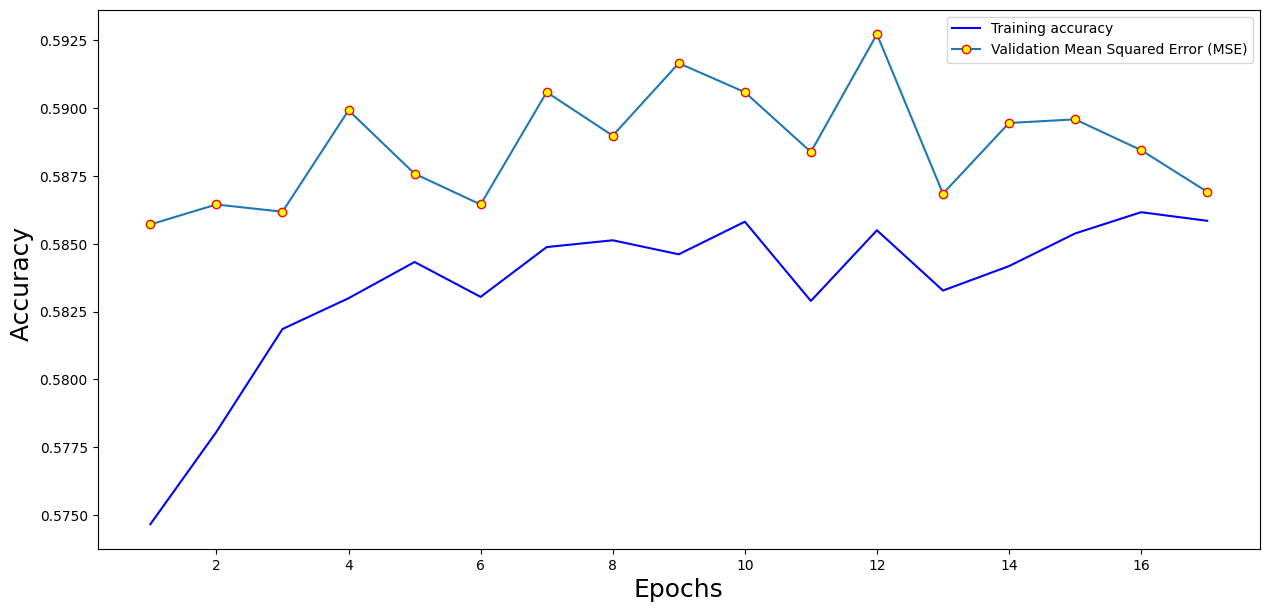

In [125]:
# More detailed MSE graph

mlp_acc_values = mlp_history_dict['accuracy']
mlp_val_acc_values = mlp_history_dict['val_accuracy']

epochs = range(1, len(mlp_acc_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mlp_acc_values, 'b', label='Training accuracy ')
plt.plot(epochs, mlp_val_acc_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy ', size=18)
plt.legend()
plt.show()

In [128]:
y_pred_ANN = (mlp_model.predict(x_test))
print(y_pred_ANN)

585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[0.38523954]
 [0.34881058]
 [0.60164183]
 ...
 [0.5489632 ]
 [0.62528366]
 [0.52620035]]


In [129]:
y_pred_mlp_labels = (y_pred_ANN >= 0.5).astype(int)

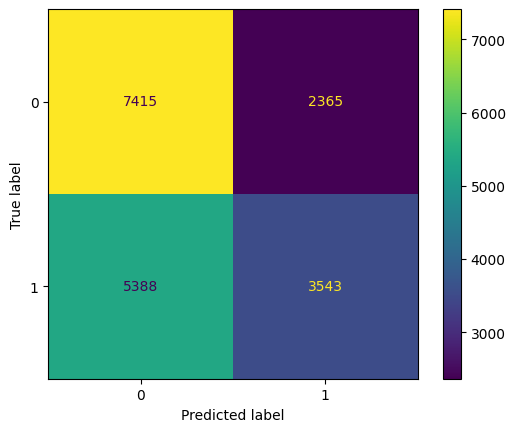

In [137]:
# Confusion matrix for mlp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, y_pred_mlp_labels)
mlp_disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=[0, 1])
mlp_disp.plot()
plt.show()

preparing data for LSTM and CNN models. creating 3d data tensors

y_train_cnn = y_train[window_size - 1:]  # Adjust index based on your step_size
y_test_cnn = y_test[window_size - 1:]  # Adjust index based on your step_size

print(y_train_cnn.shape)
print(y_test_cnn.

In [143]:
# creating CNN architecture
cnn_model = keras.Sequential([
    keras.layers.Conv1D(32,3,padding= 'same', input_shape=(10, 10), activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64,3, padding='same', activation= tf.nn.relu, kernel_initializer = 'normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(16, activation= tf.nn.relu, kernel_initializer = 'normal'),

    keras.layers.Dense(1, activation='sigmoid')
])
print(cnn_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,257 (32.25 KB)

 Trainable params: 8,257 (32.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [149]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
# Early Stopping parameters

cnn_es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
cnn_mc = ModelCheckpoint('best_model_CNN_USD/CAD.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [150]:
cnn_history = cnn_model.fit(x_train_cnn, y_train_cnn, batch_size=30, epochs = 20, validation_split=0.2, verbose=1,callbacks = [cnn_es,cnn_mc] )

Epoch 1/20
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5518 - loss: 0.6866
Epoch 1: val_accuracy improved from -inf to 0.58141, saving model to best_model_CNN_USD/CAD.keras
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5519 - loss: 0.6866 - val_accuracy: 0.5814 - val_loss: 0.6717
Epoch 2/20
1995/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5842 - loss: 0.6729
Epoch 2: val_accuracy improved from 0.58141 to 0.58763, saving model to best_model_CNN_USD/CAD.keras
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5842 - loss: 0.6729 - val_accuracy: 0.5876 - val_loss: 0.6688
Epoch 3/20
1984/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5818 - loss: 0.6712
Epoch 3: val_accuracy did not improve from 0.58763
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5818 - loss: 0.6712 - val_accuracy: 0.5870 - val_loss: 0.6686
Epoch 4/20
1988/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5800 - loss: 0.6721
Epoch 4: val_accuracy did not improve fr

In [151]:
CNN_saved_best_model = keras.models.load_model('best_model_CNN_USD/CAD.keras')

In [152]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

cnn_scores = CNN_saved_best_model.evaluate(x_test_cnn, y_test_cnn, verbose=1)

585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5831 - loss: 0.6715


Text(0.5, 0, 'binary crossentropy')

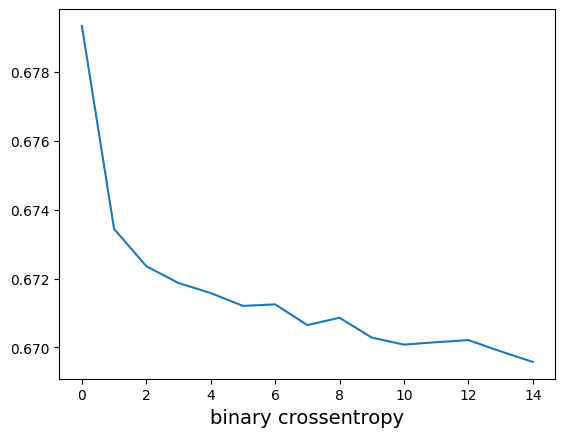

In [153]:
plt.plot(cnn_history.history['loss'])
plt.xlabel('binary crossentropy', size = 14)

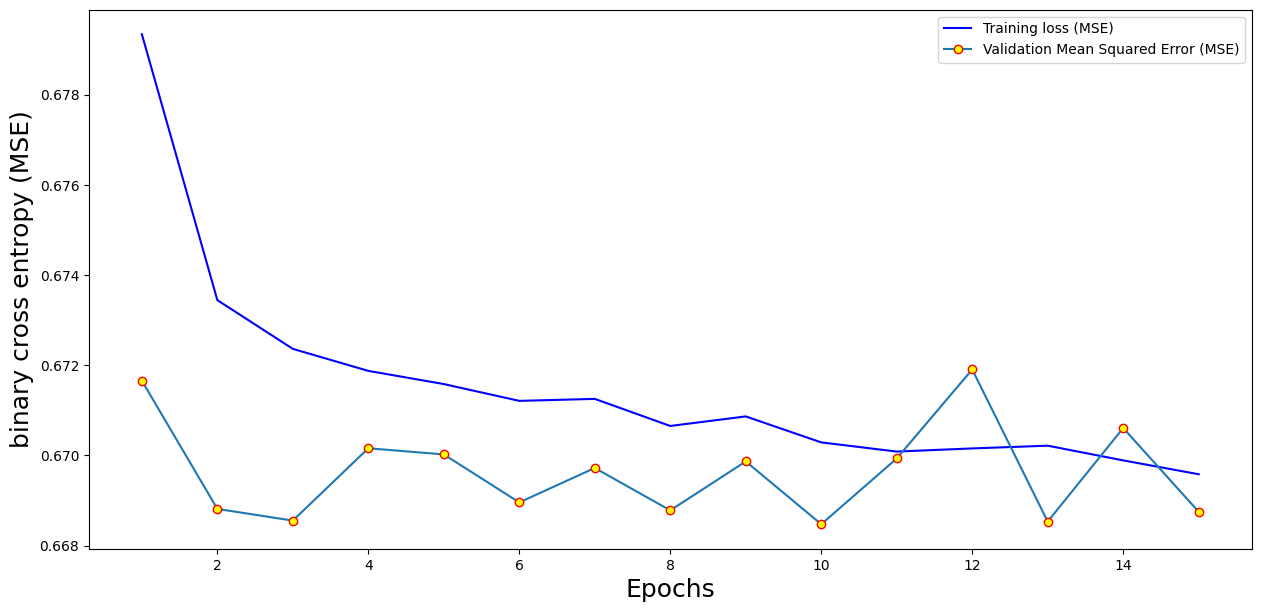

In [155]:
# More detailed MSE graph

cnn_history_dict = cnn_history.history

cnn_loss_values = cnn_history_dict['loss']
cnn_val_loss_values = cnn_history_dict['val_loss']

epochs = range(1, len(cnn_loss_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, cnn_loss_values, 'b', label='Training loss (MSE)')
plt.plot(epochs, cnn_val_loss_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('binary cross entropy (MSE)', size=18)
plt.legend()
plt.show()

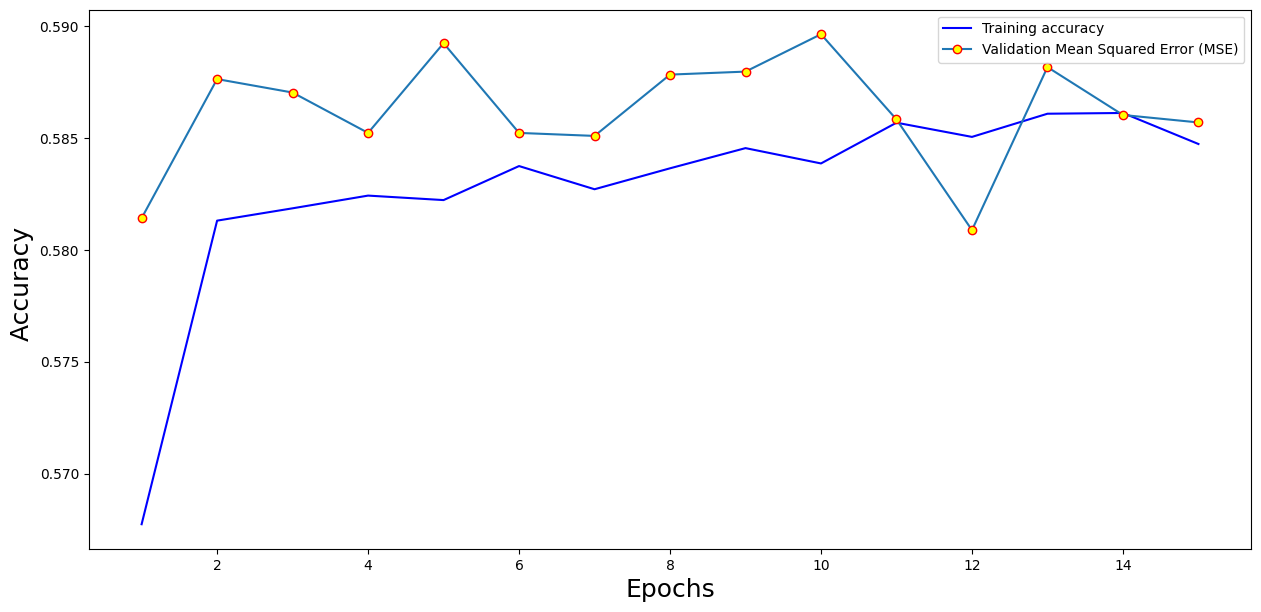

In [157]:
# More detailed MSE graph

cnn_acc_values = cnn_history_dict['accuracy']
cnn_val_acc_values = cnn_history_dict['val_accuracy']

epochs = range(1, len(cnn_acc_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, cnn_acc_values, 'b', label='Training accuracy ')
plt.plot(epochs, cnn_val_acc_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy ', size=18)
plt.legend()
plt.show()

In [158]:
y_pred_cnn = (cnn_model.predict(x_test_cnn))
print(y_pred_cnn)

585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[0.4855068 ]
 [0.36039346]
 [0.49187112]
 ...
 [0.55149883]
 [0.66920376]
 [0.52140576]]


In [159]:
y_pred_cnn_labels = (y_pred_cnn >= 0.5).astype(int)

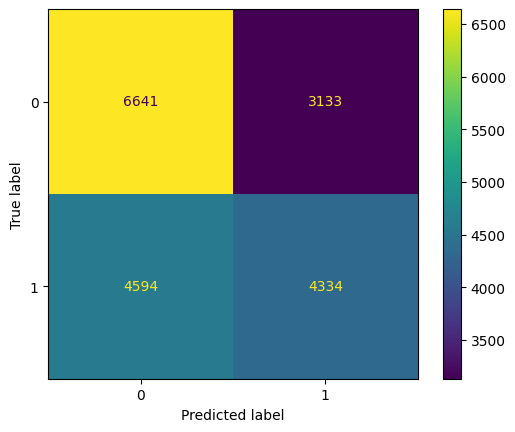

In [160]:
# Confusion matrix for ANN
cnn_cm = confusion_matrix(y_test_cnn, y_pred_cnn_labels)
cnn_disp = ConfusionMatrixDisplay(confusion_matrix=cnn_cm, display_labels=[0, 1])
cnn_disp.plot()
plt.show()

preparing data for LSTM training

In [163]:
x_train_lstm = x_train.values.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_lstm = x_test.values.reshape(x_test.shape[0], 1, x_test.shape[1])

print(x_train_lstm.shape)
print(x_test_lstm.shape)

(74840, 1, 10)
(18711, 1, 10)


In [164]:
lstm_model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

print(lstm_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,251 (47.86 KB)

 Trainable params: 12,251 (47.86 KB)

 Non-trainable params: 0 (0.00 B)

None


In [165]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
# Early Stopping parameters

lstm_es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
lstm_mc = ModelCheckpoint('best_model_LSTM_USD/CAD.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [170]:
lstm_history = lstm_model.fit(x_train_lstm, y_train, batch_size=30, epochs = 20, validation_split=0.2, verbose=1,callbacks = [lstm_es,lstm_mc] )

Epoch 1/20
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5682 - loss: 0.6918
Epoch 1: val_accuracy improved from -inf to 0.58111, saving model to best_model_LSTM_USD/CAD.keras
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5683 - loss: 0.6918 - val_accuracy: 0.5811 - val_loss: 0.6714
Epoch 2/20
1969/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 0.6737
Epoch 2: val_accuracy improved from 0.58111 to 0.58699, saving model to best_model_LSTM_USD/CAD.keras
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5804 - loss: 0.6737 - val_accuracy: 0.5870 - val_loss: 0.6695
Epoch 3/20
1993/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5823 - loss: 0.6717
Epoch 3: val_accuracy did not improve from 0.58699
1996/1996 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5823 - loss: 0.6717 - val_accuracy: 0.5840 - val_loss: 0.6701
Epoch 4/20
1995/1996 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 0.6693
Epoch 4: val_accuracy did not improve 

In [171]:
LSTM_saved_best_model = keras.models.load_model('best_model_LSTM_USD/CAD.keras')

In [174]:
# Evaluate the quality of network training on test data, which the network has NOT seen.

lstm_scores = LSTM_saved_best_model.evaluate(x_test_lstm, y_test, verbose=1)

585/585 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5876 - loss: 0.6708


Text(0.5, 0, 'binary crossentropy')

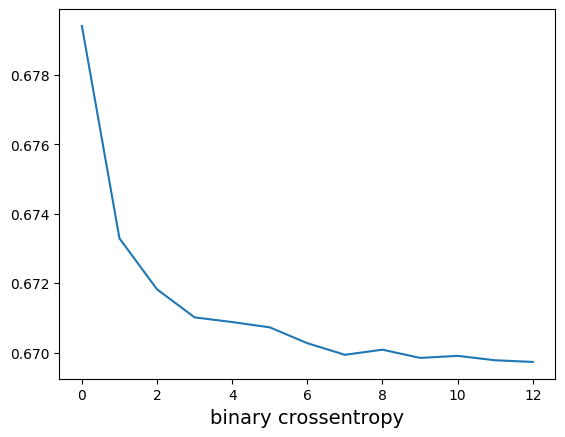

In [175]:
plt.plot(lstm_history.history['loss'])
plt.xlabel('binary crossentropy', size = 14)

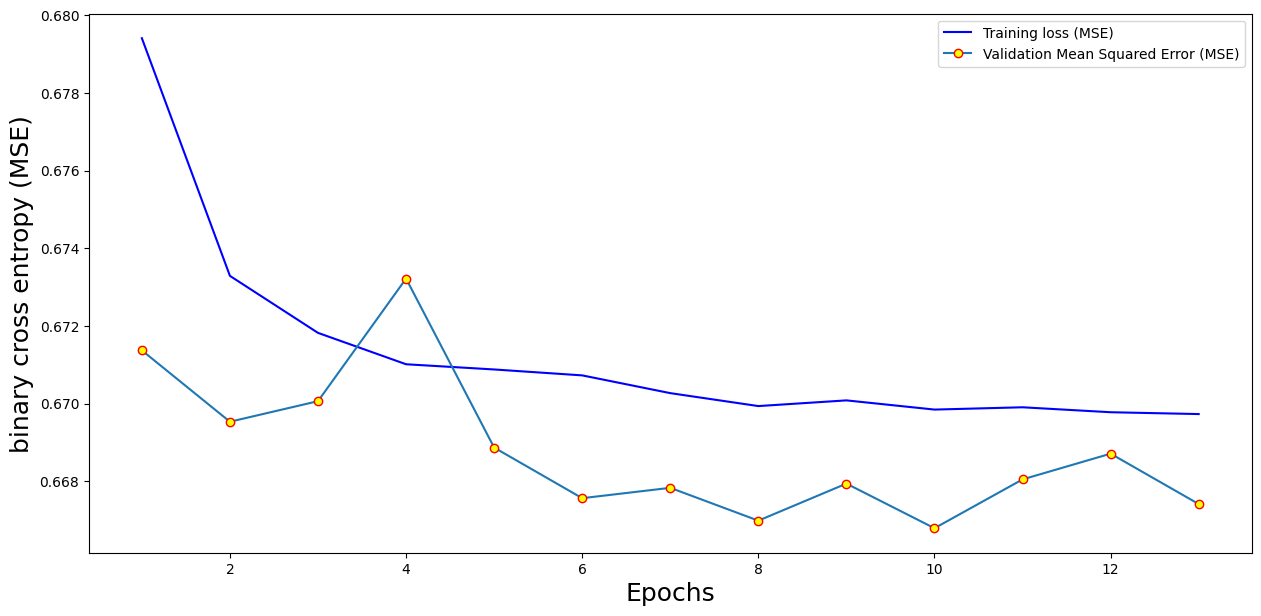

In [176]:
# More detailed MSE graph

lstm_history_dict = lstm_history.history

lstm_loss_values = lstm_history_dict['loss']
lstm_val_loss_values = lstm_history_dict['val_loss']

epochs = range(1, len(lstm_loss_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, lstm_loss_values, 'b', label='Training loss (MSE)')
plt.plot(epochs, lstm_val_loss_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('binary cross entropy (MSE)', size=18)
plt.legend()
plt.show()

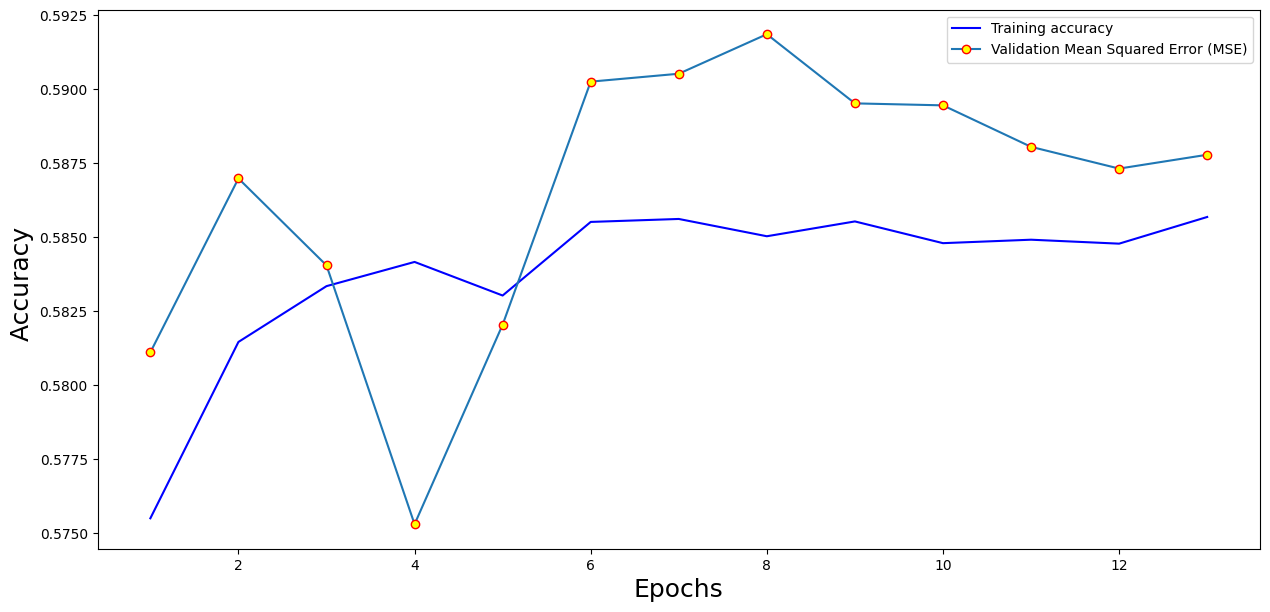

In [177]:
# More detailed MSE graph

lstm_acc_values = lstm_history_dict['accuracy']
lstm_val_acc_values = lstm_history_dict['val_accuracy']

epochs = range(1, len(lstm_acc_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, lstm_acc_values, 'b', label='Training accuracy ')
plt.plot(epochs, lstm_val_acc_values, marker='o', markeredgecolor='red', markerfacecolor='yellow', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Accuracy ', size=18)
plt.legend()
plt.show()

In [178]:
y_pred_lstm = (lstm_model.predict(x_test_lstm))
print(y_pred_lstm)

585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[0.389122  ]
 [0.37985018]
 [0.61977845]
 ...
 [0.5569778 ]
 [0.64051807]
 [0.54294   ]]


In [179]:
y_pred_lstm_labels = (y_pred_lstm >= 0.5).astype(int)

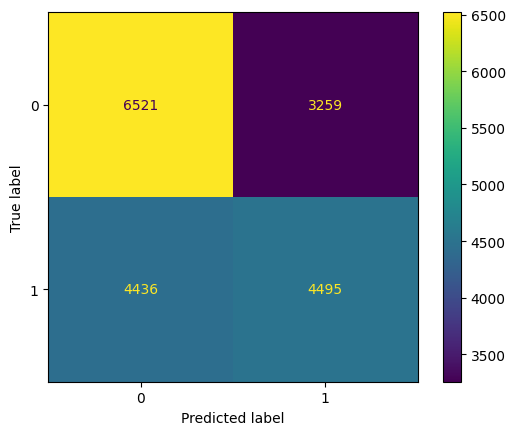

In [180]:
# Confusion matrix for ANN
lstm_cm = confusion_matrix(y_test, y_pred_lstm_labels)
lstm_disp = ConfusionMatrixDisplay(confusion_matrix=lstm_cm, display_labels=[0, 1])
lstm_disp.plot()
plt.show()

In [181]:
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [182]:
trained_models = ['Random Forest', 'SVM', 'MLP', 'CNN', 'LSTM']
prediction_imb = [y_pred_rf, y_pred_svm, y_pred_ANN, y_pred_cnn, y_pred_lstm]

In [184]:
threshold = 0.5
prediction_imb = [np.where(pred >= threshold, 1, 0) for pred in prediction_imb]

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have y_test and predictions for each model (y_pred_rf, y_pred_svm, y_pred_mlp, y_pred_cnn, y_pred_lstm)

# Calculate metrics for each model
model_names = ['RF', 'SVM', 'MLP', 'LSTM']
predictions = [y_pred_rf, y_pred_svm, y_pred_ANN, y_pred_lstm]

results = []
for model_name, y_pred in zip(model_names, predictions):
    # Apply threshold to predictions
    y_pred_binary = (y_pred >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    results.append([model_name, accuracy, precision, recall, f1])

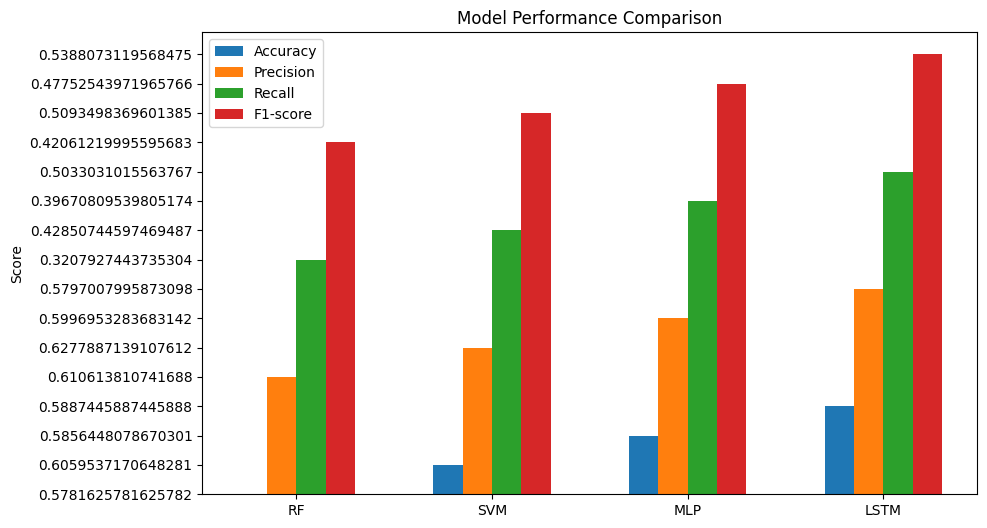

In [191]:
# Convert results to NumPy array for easier plotting
results_array = np.array(results)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x_pos = np.arange(len(model_names))

ax.bar(x_pos, results_array[:, 1], width=bar_width, label='Accuracy')
ax.bar(x_pos + bar_width, results_array[:, 2], width=bar_width, label='Precision')
ax.bar(x_pos + 2 * bar_width, results_array[:, 3], width=bar_width, label='Recall')
ax.bar(x_pos + 3 * bar_width, results_array[:, 4], width=bar_width, label='F1-score')

# Set chart labels and title
ax.set_xticks(x_pos + 1.5 * bar_width)
ax.set_xticklabels(model_names)
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

plt.show()